In [1]:
import pandas as pd
import csv
import requests
import json
from pprint import pprint
# Google developer API key
from config import gkey
import matplotlib.pyplot as plt


## Cleanup Median Home Price dataset

In [2]:
df=pd.read_csv("Resources/medianhomeprice.csv")
df.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,"Chicago, IL",2/12/2020,$133K,-5.80%,-1.30%,"1,566",11.10%,9.90%,"3,588",22.90%,8.00%,"13,635",2.10%,-22.60%,93,4.0,5.0,94.80%,-0.20%,-1.10%
1,"Chicago, IL",3/12/2020,$155K,16.30%,3.30%,"2,006",28.10%,8.10%,"4,084",13.80%,-13.10%,"13,740",0.80%,-23.60%,98,5.0,7.0,95.20%,0.40%,-0.80%
2,"Chicago, IL",4/12/2020,$170K,9.70%,12.20%,"2,192",9.30%,14.60%,"3,795",-7.10%,-2.10%,"13,645",-0.70%,-23.80%,74,-24.0,-23.0,95.50%,0.20%,-0.10%
3,"Chicago, IL",5/12/2020,$192K,12.60%,11.70%,"2,493",13.70%,15.90%,"3,856",1.60%,2.60%,"13,462",-1.30%,-24.50%,66,-8.0,-16.0,96.20%,0.70%,0.00%
4,"Chicago, IL",6/12/2020,$199K,3.70%,5.70%,"2,748",10.20%,21.10%,"3,478",-9.80%,-5.20%,"13,089",-2.80%,-25.10%,60,-6.0,-21.0,96.30%,0.20%,1.00%


In [3]:
date=df["Month of Period End"].str.split("/",n = 2, expand = True)
month=pd.to_numeric(date[0])
year=pd.to_numeric(date[1])+2000
date=pd.to_numeric(date[2])-2019
date_new=pd.DataFrame({"year":year,"month":month,"day":date})
date_new=pd.to_datetime(date_new, format='%m%d%y')
date_df=pd.DataFrame({"month_year":date_new})
date_df


,month_year
0,2012-02-01
1,2012-03-01
2,2012-04-01
3,2012-05-01
4,2012-06-01
...,...
25476,2020-01-01
25477,2020-02-01
25478,2020-03-01
25479,2020-04-01


In [4]:
date_df['month_year'] = pd.to_datetime(date_df['month_year']).dt.to_period('M')
date_df

,month_year
0,2012-02
1,2012-03
2,2012-04
3,2012-05
4,2012-06
...,...
25476,2020-01
25477,2020-02
25478,2020-03
25479,2020-04


In [5]:
df["month_year"]=date_df['month_year']
df.drop(columns=("Month of Period End"),inplace=True)
df

,Region,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY,month_year
0,"Chicago, IL",$133K,-5.80%,-1.30%,"1,566",11.10%,9.90%,"3,588",22.90%,8.00%,"13,635",2.10%,-22.60%,93,4.0,5.0,94.80%,-0.20%,-1.10%,2012-02
1,"Chicago, IL",$155K,16.30%,3.30%,"2,006",28.10%,8.10%,"4,084",13.80%,-13.10%,"13,740",0.80%,-23.60%,98,5.0,7.0,95.20%,0.40%,-0.80%,2012-03
2,"Chicago, IL",$170K,9.70%,12.20%,"2,192",9.30%,14.60%,"3,795",-7.10%,-2.10%,"13,645",-0.70%,-23.80%,74,-24.0,-23.0,95.50%,0.20%,-0.10%,2012-04
3,"Chicago, IL",$192K,12.60%,11.70%,"2,493",13.70%,15.90%,"3,856",1.60%,2.60%,"13,462",-1.30%,-24.50%,66,-8.0,-16.0,96.20%,0.70%,0.00%,2012-05
4,"Chicago, IL",$199K,3.70%,5.70%,"2,748",10.20%,21.10%,"3,478",-9.80%,-5.20%,"13,089",-2.80%,-25.10%,60,-6.0,-21.0,96.30%,0.20%,1.00%,2012-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25476,"Chicago, IL - Wrigleyville",$479K,5.20%,12.60%,14,-26.30%,55.60%,17,54.50%,142.90%,18,0.00%,80.00%,93,39.0,21.0,98.60%,0.10%,1.80%,2020-01
25477,"Chicago, IL - Wrigleyville",$525K,9.70%,24.30%,11,-21.40%,22.20%,26,52.90%,100.00%,25,38.90%,56.30%,91,-2.0,19.0,98.20%,-0.40%,1.30%,2020-02
25478,"Chicago, IL - Wrigleyville",$475K,-9.50%,18.80%,12,9.10%,33.30%,28,7.70%,3.70%,23,-8.00%,-8.00%,75,-17.0,3.0,98.60%,0.40%,0.80%,2020-03
25479,"Chicago, IL - Wrigleyville",$485K,2.10%,15.50%,17,41.70%,88.90%,25,-10.70%,-32.40%,19,-17.40%,-24.00%,58,-17.0,23.0,97.70%,-0.90%,-1.30%,2020-04


In [6]:
df['Median Sale Price'] = df['Median Sale Price'].str.replace('K', '').str.replace('$','').str.replace(',','').astype(float)
#df['Median Sale Price YoY'] = df['Median Sale Price MoM'].str.replace('%', '').astype(float)
df['Homes Sold'] = df['Homes Sold'].str.replace(',','').astype(float)
#df['Homes Sold MoM'] = df['Homes Sold MoM '].astype(float)
# df['Homes Sold YoY'] = df['Homes Sold YoY'].str.replace('%', '').astype(float)
df['New Listings']=df['New Listings'].str.replace(',','').astype(float)
# df['New Listings MoM'] = df['New Listings MoM'].str.replace('%', '').astype(float)
# df['New Listings YoY'] = df['New Listings YoY'].str.replace('%', '').astype(float)
df["Inventory"] = df["Inventory"].str.replace(',','').astype(float)
# df['Inventory MoM'] = df['Inventory MoM'].str.replace('%', '').astype(float)
# df['Inventory YoY'] = df['Inventory YoY'].str.replace('%', '').astype(float)
df['Days on Market'] = df['Days on Market'].str.replace(',','').astype(float)
df['Days on Market MoM'] = df['Days on Market MoM'].astype(float)
df['Days on Market YoY'] = df['Days on Market YoY'].astype(float)
# df['Average Sale To List'] = df['Average Sale To List'].str.replace('%','').astype(float)
# df['Average Sale To List MoM'] = df['Average Sale To List MoM'].str.replace('%', '').astype(float)
# df['Average Sale To List YoY'] = df['Average Sale To List YoY'].str.replace('%', '').astype(float)
df

,Region,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY,month_year
0,"Chicago, IL",133.0,-5.80%,-1.30%,1566.0,11.10%,9.90%,3588.0,22.90%,8.00%,13635.0,2.10%,-22.60%,93.0,4.0,5.0,94.80%,-0.20%,-1.10%,2012-02
1,"Chicago, IL",155.0,16.30%,3.30%,2006.0,28.10%,8.10%,4084.0,13.80%,-13.10%,13740.0,0.80%,-23.60%,98.0,5.0,7.0,95.20%,0.40%,-0.80%,2012-03
2,"Chicago, IL",170.0,9.70%,12.20%,2192.0,9.30%,14.60%,3795.0,-7.10%,-2.10%,13645.0,-0.70%,-23.80%,74.0,-24.0,-23.0,95.50%,0.20%,-0.10%,2012-04
3,"Chicago, IL",192.0,12.60%,11.70%,2493.0,13.70%,15.90%,3856.0,1.60%,2.60%,13462.0,-1.30%,-24.50%,66.0,-8.0,-16.0,96.20%,0.70%,0.00%,2012-05
4,"Chicago, IL",199.0,3.70%,5.70%,2748.0,10.20%,21.10%,3478.0,-9.80%,-5.20%,13089.0,-2.80%,-25.10%,60.0,-6.0,-21.0,96.30%,0.20%,1.00%,2012-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25476,"Chicago, IL - Wrigleyville",479.0,5.20%,12.60%,14.0,-26.30%,55.60%,17.0,54.50%,142.90%,18.0,0.00%,80.00%,93.0,39.0,21.0,98.60%,0.10%,1.80%,2020-01
25477,"Chicago, IL - Wrigleyville",525.0,9.70%,24.30%,11.0,-21.40%,22.20%,26.0,52.90%,100.00%,25.0,38.90%,56.30%,91.0,-2.0,19.0,98.20%,-0.40%,1.30%,2020-02
25478,"Chicago, IL - Wrigleyville",475.0,-9.50%,18.80%,12.0,9.10%,33.30%,28.0,7.70%,3.70%,23.0,-8.00%,-8.00%,75.0,-17.0,3.0,98.60%,0.40%,0.80%,2020-03
25479,"Chicago, IL - Wrigleyville",485.0,2.10%,15.50%,17.0,41.70%,88.90%,25.0,-10.70%,-32.40%,19.0,-17.40%,-24.00%,58.0,-17.0,23.0,97.70%,-0.90%,-1.30%,2020-04


In [7]:
df=df[['Region','month_year','Median Sale Price','Homes Sold','New Listings','Inventory','Days on Market','Days on Market MoM','Days on Market YoY']]
df

,Region,month_year,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY
0,"Chicago, IL",2012-02,133.0,1566.0,3588.0,13635.0,93.0,4.0,5.0
1,"Chicago, IL",2012-03,155.0,2006.0,4084.0,13740.0,98.0,5.0,7.0
2,"Chicago, IL",2012-04,170.0,2192.0,3795.0,13645.0,74.0,-24.0,-23.0
3,"Chicago, IL",2012-05,192.0,2493.0,3856.0,13462.0,66.0,-8.0,-16.0
4,"Chicago, IL",2012-06,199.0,2748.0,3478.0,13089.0,60.0,-6.0,-21.0
...,...,...,...,...,...,...,...,...,...
25476,"Chicago, IL - Wrigleyville",2020-01,479.0,14.0,17.0,18.0,93.0,39.0,21.0
25477,"Chicago, IL - Wrigleyville",2020-02,525.0,11.0,26.0,25.0,91.0,-2.0,19.0
25478,"Chicago, IL - Wrigleyville",2020-03,475.0,12.0,28.0,23.0,75.0,-17.0,3.0
25479,"Chicago, IL - Wrigleyville",2020-04,485.0,17.0,25.0,19.0,58.0,-17.0,23.0


In [8]:
region=df.groupby(df["Region"])
region_price=pd.DataFrame(region["Median Sale Price"].mean())
region_price.sort_values(by='Median Sale Price', ascending=False)[0:10]

,Median Sale Price
Region,
"Chicago, IL - DePaul",707.73
"Chicago, IL - Sheffield",682.00
"Chicago, IL - Magnificent Mile",669.48
"Chicago, IL - St. Ben's",638.98
"Chicago, IL - West DePaul",634.37
"Chicago, IL - Ranch Triangle",596.18
"Chicago, IL - Lathrop",590.16
"Chicago, IL - South East Ravenswood",563.02
"Chicago, IL - Roscoe Village",546.98


In [12]:
df.to_csv("Resources/home_price_clean.csv", encoding="utf-8", index=True)

## Cleanup Building Permit dataset

In [13]:
data=pd.read_csv("Building_Permits.csv")
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,PERMIT#,PERMIT_TYPE,REVIEW_TYPE,APPLICATION_START_DATE,ISSUE_DATE,PROCESSING_TIME,STREET_NUMBER,STREET DIRECTION,STREET_NAME,...,PIN9,PIN10,COMMUNITY_AREA,CENSUS_TRACT,WARD,XCOORDINATE,YCOORDINATE,LATITUDE,LONGITUDE,LOCATION
0,2530006,100523607,PERMIT - SIGNS,SIGN PERMIT,2/24/2014,3/4/2014,8.0,10000,W,OHARE,...,NaN,NaN,76.0,980000.0,41.0,NaN,NaN,NaN,NaN,NaN
1,2506958,100510546,PERMIT - SIGNS,SIGN PERMIT,11/18/2013,12/19/2013,31.0,10000,N,BESSIE COLEMAN,...,NaN,NaN,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2506971,100510558,PERMIT - SIGNS,SIGN PERMIT,11/18/2013,12/19/2013,31.0,10000,N,BESSIE COLEMAN,...,NaN,NaN,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2818648,100687794,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,1/25/2017,1/25/2017,0.0,150,N,RIVERSIDE,...,NaN,NaN,28.0,2801.0,42.0,NaN,NaN,NaN,NaN,NaN
4,1779434,100163126,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2/15/2007,2/15/2007,0.0,6431,S,COTTAGE GROVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data_1=data[['ID','PERMIT#','ISSUE_DATE','LATITUDE', 'LONGITUDE', 'LOCATION','STREET_NUMBER','STREET DIRECTION','STREET_NAME','SUFFIX']]
data_1.dropna(how='any', inplace=True)
data_1.reset_index(inplace=True)
data_1.drop(columns=["index"],inplace=True)
data_1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ID,PERMIT#,ISSUE_DATE,LATITUDE,LONGITUDE,LOCATION,STREET_NUMBER,STREET DIRECTION,STREET_NAME,SUFFIX
0,3074370,100843365,9/30/2019,41.914747,-87.668877,POINT (-87.66887701673 41.914747232626),1815,N,MARSHFIELD,AVE
1,3057587,100833188,6/26/2020,41.698170,-87.621024,POINT (-87.621024196753 41.698169997345),10758,S,MICHIGAN,AVE
2,3109188,100863890,6/26/2020,41.892390,-87.617561,POINT (-87.617560803385 41.892389499173),545,N,MCCLURG,CT
3,3119579,100871389,6/25/2020,41.771653,-87.617177,POINT (-87.617176702992 41.771653034906),6742,S,CALUMET,AVE
4,3121712,100873285,6/25/2020,41.787077,-87.644823,POINT (-87.644823470388 41.787077098336),5859,S,HALSTED,ST
...,...,...,...,...,...,...,...,...,...,...
622998,3029934,100816082,1/15/2020,41.862311,-87.713383,POINT (-87.713382676241 41.862310776452),3511,W,DOUGLAS,BLVD
622999,3100340,100858686,1/15/2020,41.782263,-87.773957,POINT (-87.773957010619 41.782263304288),6035,S,MEADE,AVE
623000,3100002,100858520,1/15/2020,41.878996,-87.724276,POINT (-87.7242756161 41.878995986582),3926,W,WILCOX,ST
623001,3100352,100858698,1/15/2020,41.974495,-87.813161,POINT (-87.813160767331 41.97449497624),7430,W,FOSTER,AVE


In [15]:
data_1["address"]=data_1["STREET_NUMBER"].astype(str) +" "+ data_1["STREET DIRECTION"]+" "+data_1["STREET_NAME"]+" "+data_1["SUFFIX"]
data_1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,PERMIT#,ISSUE_DATE,LATITUDE,LONGITUDE,LOCATION,STREET_NUMBER,STREET DIRECTION,STREET_NAME,SUFFIX,address
0,3074370,100843365,9/30/2019,41.914747,-87.668877,POINT (-87.66887701673 41.914747232626),1815,N,MARSHFIELD,AVE,1815 N MARSHFIELD AVE
1,3057587,100833188,6/26/2020,41.698170,-87.621024,POINT (-87.621024196753 41.698169997345),10758,S,MICHIGAN,AVE,10758 S MICHIGAN AVE
2,3109188,100863890,6/26/2020,41.892390,-87.617561,POINT (-87.617560803385 41.892389499173),545,N,MCCLURG,CT,545 N MCCLURG CT
3,3119579,100871389,6/25/2020,41.771653,-87.617177,POINT (-87.617176702992 41.771653034906),6742,S,CALUMET,AVE,6742 S CALUMET AVE
4,3121712,100873285,6/25/2020,41.787077,-87.644823,POINT (-87.644823470388 41.787077098336),5859,S,HALSTED,ST,5859 S HALSTED ST
...,...,...,...,...,...,...,...,...,...,...,...
622998,3029934,100816082,1/15/2020,41.862311,-87.713383,POINT (-87.713382676241 41.862310776452),3511,W,DOUGLAS,BLVD,3511 W DOUGLAS BLVD
622999,3100340,100858686,1/15/2020,41.782263,-87.773957,POINT (-87.773957010619 41.782263304288),6035,S,MEADE,AVE,6035 S MEADE AVE
623000,3100002,100858520,1/15/2020,41.878996,-87.724276,POINT (-87.7242756161 41.878995986582),3926,W,WILCOX,ST,3926 W WILCOX ST
623001,3100352,100858698,1/15/2020,41.974495,-87.813161,POINT (-87.813160767331 41.97449497624),7430,W,FOSTER,AVE,7430 W FOSTER AVE


In [16]:
data_1['month_year'] = pd.to_datetime(data_1['ISSUE_DATE']).dt.to_period('M')
data_1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,PERMIT#,ISSUE_DATE,LATITUDE,LONGITUDE,LOCATION,STREET_NUMBER,STREET DIRECTION,STREET_NAME,SUFFIX,address,month_year
0,3074370,100843365,9/30/2019,41.914747,-87.668877,POINT (-87.66887701673 41.914747232626),1815,N,MARSHFIELD,AVE,1815 N MARSHFIELD AVE,2019-09
1,3057587,100833188,6/26/2020,41.698170,-87.621024,POINT (-87.621024196753 41.698169997345),10758,S,MICHIGAN,AVE,10758 S MICHIGAN AVE,2020-06
2,3109188,100863890,6/26/2020,41.892390,-87.617561,POINT (-87.617560803385 41.892389499173),545,N,MCCLURG,CT,545 N MCCLURG CT,2020-06
3,3119579,100871389,6/25/2020,41.771653,-87.617177,POINT (-87.617176702992 41.771653034906),6742,S,CALUMET,AVE,6742 S CALUMET AVE,2020-06
4,3121712,100873285,6/25/2020,41.787077,-87.644823,POINT (-87.644823470388 41.787077098336),5859,S,HALSTED,ST,5859 S HALSTED ST,2020-06
...,...,...,...,...,...,...,...,...,...,...,...,...
622998,3029934,100816082,1/15/2020,41.862311,-87.713383,POINT (-87.713382676241 41.862310776452),3511,W,DOUGLAS,BLVD,3511 W DOUGLAS BLVD,2020-01
622999,3100340,100858686,1/15/2020,41.782263,-87.773957,POINT (-87.773957010619 41.782263304288),6035,S,MEADE,AVE,6035 S MEADE AVE,2020-01
623000,3100002,100858520,1/15/2020,41.878996,-87.724276,POINT (-87.7242756161 41.878995986582),3926,W,WILCOX,ST,3926 W WILCOX ST,2020-01
623001,3100352,100858698,1/15/2020,41.974495,-87.813161,POINT (-87.813160767331 41.97449497624),7430,W,FOSTER,AVE,7430 W FOSTER AVE,2020-01


In [22]:
count_df=data_1.groupby(data_1["month_year"]).count()
count_df

,ID,PERMIT#,ISSUE_DATE,LATITUDE,LONGITUDE,LOCATION,STREET_NUMBER,STREET DIRECTION,STREET_NAME,SUFFIX,address
month_year,,,,,,,,,,,
2006-01,3952,3952,3952,3952,3952,3952,3952,3952,3952,3952,3952
2006-02,3794,3794,3794,3794,3794,3794,3794,3794,3794,3794,3794
2006-03,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694
2006-04,3745,3745,3745,3745,3745,3745,3745,3745,3745,3745,3745
2006-05,4146,4146,4146,4146,4146,4146,4146,4146,4146,4146,4146
...,...,...,...,...,...,...,...,...,...,...,...
2020-03,3623,3623,3623,3623,3623,3623,3623,3623,3623,3623,3623
2020-04,3179,3179,3179,3179,3179,3179,3179,3179,3179,3179,3179
2020-05,3006,3006,3006,3006,3006,3006,3006,3006,3006,3006,3006


In [25]:
count_df.reset_index(inplace=True)
count_df

,index,month_year,ID,PERMIT#,ISSUE_DATE,LATITUDE,LONGITUDE,LOCATION,STREET_NUMBER,STREET DIRECTION,STREET_NAME,SUFFIX,address
0,0,2006-01,3952,3952,3952,3952,3952,3952,3952,3952,3952,3952,3952
1,1,2006-02,3794,3794,3794,3794,3794,3794,3794,3794,3794,3794,3794
2,2,2006-03,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694,4694
3,3,2006-04,3745,3745,3745,3745,3745,3745,3745,3745,3745,3745,3745
4,4,2006-05,4146,4146,4146,4146,4146,4146,4146,4146,4146,4146,4146
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,170,2020-03,3623,3623,3623,3623,3623,3623,3623,3623,3623,3623,3623
171,171,2020-04,3179,3179,3179,3179,3179,3179,3179,3179,3179,3179,3179
172,172,2020-05,3006,3006,3006,3006,3006,3006,3006,3006,3006,3006,3006
173,173,2020-06,3567,3567,3567,3567,3567,3567,3567,3567,3567,3567,3567


## Chicago home price vs. building permits

In [26]:
chicago_df=df.loc[df["Region"]=="Chicago, IL"]
chicago_df

,Region,month_year,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY
0,"Chicago, IL",2012-02,133.0,1566.0,3588.0,13635.0,93.0,4.0,5.0
1,"Chicago, IL",2012-03,155.0,2006.0,4084.0,13740.0,98.0,5.0,7.0
2,"Chicago, IL",2012-04,170.0,2192.0,3795.0,13645.0,74.0,-24.0,-23.0
3,"Chicago, IL",2012-05,192.0,2493.0,3856.0,13462.0,66.0,-8.0,-16.0
4,"Chicago, IL",2012-06,199.0,2748.0,3478.0,13089.0,60.0,-6.0,-21.0
...,...,...,...,...,...,...,...,...,...
95,"Chicago, IL",2020-01,265.0,1835.0,3101.0,8586.0,67.0,7.0,0.0
96,"Chicago, IL",2020-02,281.0,1851.0,3898.0,8662.0,75.0,8.0,1.0
97,"Chicago, IL",2020-03,315.0,2462.0,3648.0,8822.0,52.0,-23.0,-8.0
98,"Chicago, IL",2020-04,330.0,2360.0,2261.0,8685.0,26.0,-26.0,-14.0


In [121]:
price_permit=pd.merge(chicago_df,count_df,on="month_year",how="left")
chicago_df=price_permit.iloc[:,0:15]
chicago_df.rename(columns={"ID":"Permit_Count"},inplace=True)
chicago_df

,Region,month_year,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY,index,Permit_Count,PERMIT#,ISSUE_DATE,LATITUDE,LONGITUDE
0,"Chicago, IL",2012-02,133.0,1566.0,3588.0,13635.0,93.0,4.0,5.0,73,2503,2503,2503,2503,2503
1,"Chicago, IL",2012-03,155.0,2006.0,4084.0,13740.0,98.0,5.0,7.0,74,3202,3202,3202,3202,3202
2,"Chicago, IL",2012-04,170.0,2192.0,3795.0,13645.0,74.0,-24.0,-23.0,75,3508,3508,3508,3508,3508
3,"Chicago, IL",2012-05,192.0,2493.0,3856.0,13462.0,66.0,-8.0,-16.0,76,3715,3715,3715,3715,3715
4,"Chicago, IL",2012-06,199.0,2748.0,3478.0,13089.0,60.0,-6.0,-21.0,77,3580,3580,3580,3580,3580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Chicago, IL",2020-01,265.0,1835.0,3101.0,8586.0,67.0,7.0,0.0,168,3428,3428,3428,3428,3428
96,"Chicago, IL",2020-02,281.0,1851.0,3898.0,8662.0,75.0,8.0,1.0,169,3362,3362,3362,3362,3362
97,"Chicago, IL",2020-03,315.0,2462.0,3648.0,8822.0,52.0,-23.0,-8.0,170,3623,3623,3623,3623,3623
98,"Chicago, IL",2020-04,330.0,2360.0,2261.0,8685.0,26.0,-26.0,-14.0,171,3179,3179,3179,3179,3179


The r-squared is: 0.3387236081746404


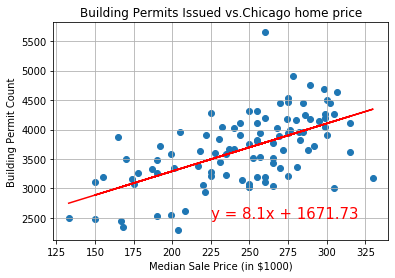

In [122]:
from scipy.stats import linregress
x=chicago_df["Median Sale Price"]
y=chicago_df["Permit_Count"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(225,2500),fontsize=15,color="red")
plt.title("Building Permits Issued vs.Chicago home price")
plt.xlabel('Median Sale Price (in $1000)')
plt.ylabel('Building Permit Count')
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("output/price_permit.png")
plt.show()

<Figure size 432x288 with 0 Axes>

## Plot Home price vs. Inventory

The r-squared is: 0.02935596294767


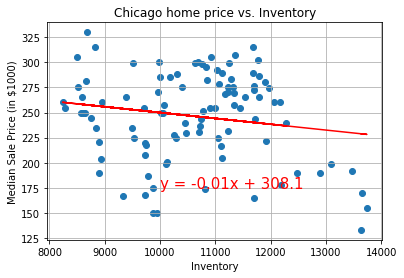

In [89]:
from scipy.stats import linregress
y=chicago_df["Median Sale Price"]
x=chicago_df["Inventory"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10000,175),fontsize=15,color="red")
plt.title("Chicago home price vs. Inventory")
plt.xlabel('Inventory')
plt.ylabel('Median Sale Price (in $1000)')
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("output/price_inventory.png")
plt.show()

## Plot Home prive vs. Days on Market

The r-squared is: 0.41998569299395433


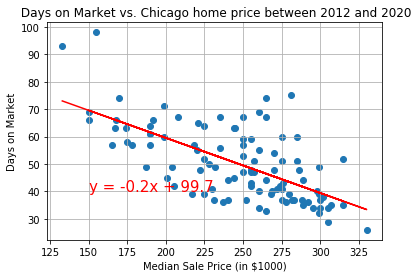

In [123]:
x=chicago_df["Median Sale Price"]
y=chicago_df["Days on Market"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(150,40),fontsize=15,color="red")
plt.title(" Days on Market vs. Chicago home price between 2012 and 2020")
plt.ylabel('Days on Market')
plt.xlabel('Median Sale Price (in $1000)')
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("output/price_daysonmarket.png")
plt.show()

The r-squared is: 0.11082675176856059


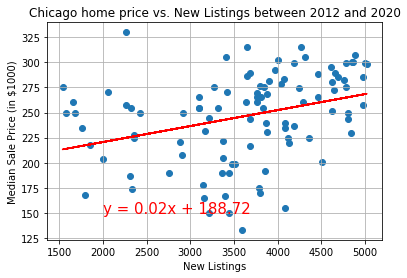

In [91]:
y=chicago_df["Median Sale Price"]
x=chicago_df["New Listings"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(2000,150),fontsize=15,color="red")
plt.title("Chicago home price vs. New Listings between 2012 and 2020")
plt.xlabel('New Listings')
plt.ylabel('Median Sale Price (in $1000)')
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("output/price_newlisting.png")
plt.show()

## Cleanup interest rate dataset

In [125]:
rate_df=pd.read_csv("Resources/mortgage_rates_monthly.csv")
rate_df.head()

,DATE,MORTGAGE30US
0,1/1/2007,6.2175
1,2/1/2007,6.2850
2,3/1/2007,6.1560
3,4/1/2007,6.1800
4,5/1/2007,6.2620


In [126]:
rate_df['DATE'] = pd.to_datetime(rate_df['DATE']).dt.to_period('M')
rate_df

,DATE,MORTGAGE30US
0,2007-01,6.217500
1,2007-02,6.285000
2,2007-03,6.156000
3,2007-04,6.180000
4,2007-05,6.262000
...,...,...
158,2020-03,3.450000
159,2020-04,3.306000
160,2020-05,3.232500
161,2020-06,3.162500


In [127]:
rate_df.rename(columns={"DATE":"month_year","MORTGAGE30US":"30Year Fixed Mortgage Rate"}, inplace=True)
rate_df

,month_year,30Year Fixed Mortgage Rate
0,2007-01,6.217500
1,2007-02,6.285000
2,2007-03,6.156000
3,2007-04,6.180000
4,2007-05,6.262000
...,...,...
158,2020-03,3.450000
159,2020-04,3.306000
160,2020-05,3.232500
161,2020-06,3.162500


## Home price vs. mortgage rate

In [33]:
price_rate=pd.merge(chicago_df,rate_df,on="month_year",how="left")
price_rate

,Region,month_year,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY,30Year Fixed Mortgage Rate
0,"Chicago, IL",2012-02,133.0,1566.0,3588.0,13635.0,93.0,4.0,5.0,3.8900
1,"Chicago, IL",2012-03,155.0,2006.0,4084.0,13740.0,98.0,5.0,7.0,3.9540
2,"Chicago, IL",2012-04,170.0,2192.0,3795.0,13645.0,74.0,-24.0,-23.0,3.9100
3,"Chicago, IL",2012-05,192.0,2493.0,3856.0,13462.0,66.0,-8.0,-16.0,3.7980
4,"Chicago, IL",2012-06,199.0,2748.0,3478.0,13089.0,60.0,-6.0,-21.0,3.6750
...,...,...,...,...,...,...,...,...,...,...
95,"Chicago, IL",2020-01,265.0,1835.0,3101.0,8586.0,67.0,7.0,0.0,3.6240
96,"Chicago, IL",2020-02,281.0,1851.0,3898.0,8662.0,75.0,8.0,1.0,3.4650
97,"Chicago, IL",2020-03,315.0,2462.0,3648.0,8822.0,52.0,-23.0,-8.0,3.4500
98,"Chicago, IL",2020-04,330.0,2360.0,2261.0,8685.0,26.0,-26.0,-14.0,3.3060


## Plot Mortgage Rate over time

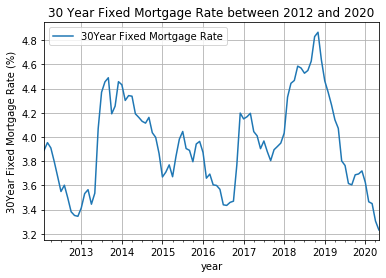

In [92]:
import matplotlib.pyplot as plt
line = price_rate.plot.line(x='month_year', y='30Year Fixed Mortgage Rate')

line.set_xlabel("year")
line.set_ylabel("30Year Fixed Mortgage Rate (%)")
line.set_title("30 Year Fixed Mortgage Rate between 2012 and 2020")
plt.grid()
plt.savefig("output/rates.png")

## Plot Median Home Price over time

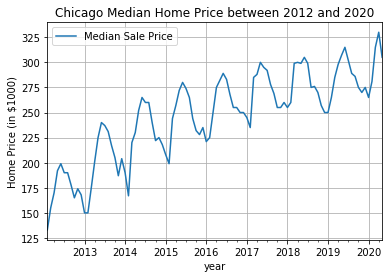

In [93]:
line = price_rate.plot.line(x='month_year', y='Median Sale Price')

line.set_xlabel("year")
line.set_ylabel("Home Price (in $1000)")
line.set_title("Chicago Median Home Price between 2012 and 2020")
plt.grid()
plt.savefig("output/price_overtime.png")

## Median Home Price vs. Mortgage Rate

The r-squared is: 0.024454583262606872


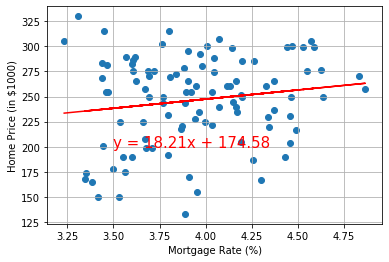

In [94]:
y=price_rate["Median Sale Price"]
x=price_rate["30Year Fixed Mortgage Rate"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(3.5,200),fontsize=15,color="red")
plt.xlabel('Mortgage Rate (%)')
plt.ylabel('Home Price (in $1000)')
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.savefig("output/price_rate.png")
plt.show()